# 6. Data Visualization

**Quick overview of the data visualization**

This notebook provides instructions to use the data visualization tools of the **3WToolkit v2.0.0**.

These tools demonstrates the data visualization capabilities of 3W Toolkit, using the following static methods of the class `DataVisualization`:

- `plot_series`: Visualizing individual time series with custom styling and event overlays
- `plot_multiple_series`: Comparing multiple time series in a single plot
- `correlation_heatmap`: Analyzing correlations between different features

We'll use the 3W dataset to demonstrate these visualization techniques with real-world data from oil well operations.

## 📋 Table of Contents

1. [Data preparation](#Data-preparation)
   1. [Importing required libraries](#Importing-Required-Libraries)
   2. [Loading the 3W Dataset](#loading-the-3w-dataset)
2. [Correlation Heatmap](#correlation-heatmap)
3. [Time-series visualization](#time-series-visualization)
4. [Multiple Series - comparing multiple time series](#multiple-series---comparing-multiple-time-series)
5. [Next Steps](#Next-Steps)
---

## Data preparation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ThreeWToolkit.data_visualization import DataVisualization


### Loading the 3W Dataset


In [2]:
from ThreeWToolkit.core.base_dataset import ParquetDatasetConfig
from ThreeWToolkit.dataset import ParquetDataset

# define path
dataset_path = "../../dataset/"

# create and load
ds_config = ParquetDatasetConfig(path=dataset_path, clean_data=False)
ds = ParquetDataset(ds_config)
len(ds)

[ParquetDataset] Dataset found at ../../dataset/
[ParquetDataset] Validating dataset integrity...
[ParquetDataset] Dataset integrity check passed!


2228

Let's select the signal of any event:

In [3]:
sig = ds[2025]["signal"].copy()

-------

## Correlation Heatmap

DataVisualization: Chart saved to 'D:\Git\3W\toolkit\output\3w_plots\plot_1.png'
DataVisualization: Chart saved to 'D:\Git\3W\toolkit\output\3w_plots\plot_2.png'


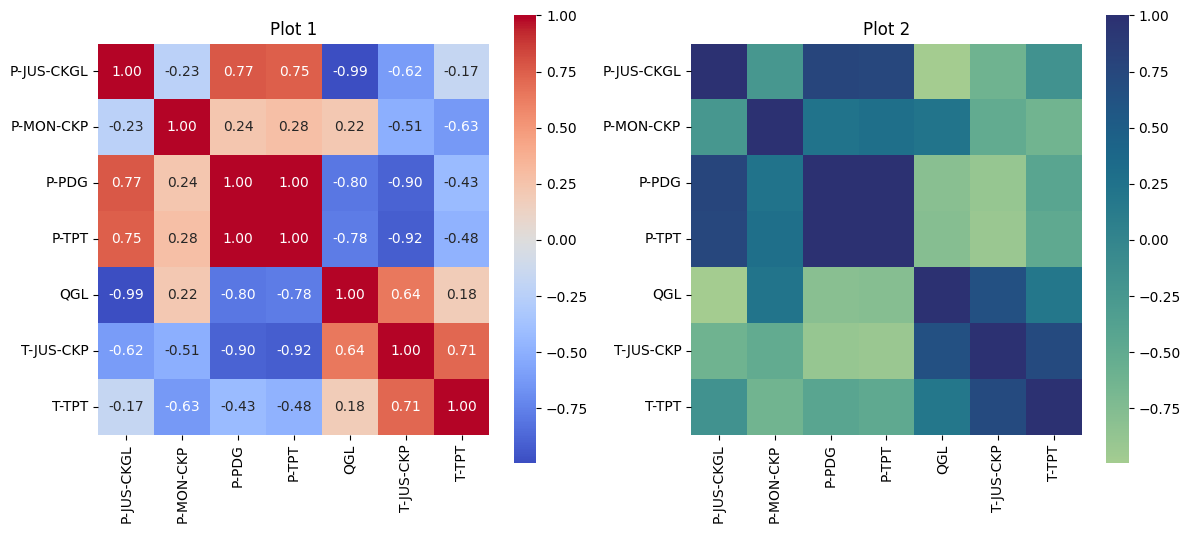

In [4]:
features_1 = ['P-JUS-CKGL', 'P-MON-CKP', 'P-PDG', 'P-TPT', 'QGL', 'T-JUS-CKP', 'T-TPT']
subset_1 = sig[features_1]

features_2 = ['P-JUS-CKGL', 'P-MON-CKP', 'P-PDG', 'P-TPT', 'QGL', 'T-JUS-CKP', 'T-TPT']
subset_2 = sig[features_2]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
DataVisualization.correlation_heatmap(subset_1, ax=axs[0], title="Plot 1", annot=True)
DataVisualization.correlation_heatmap(subset_2, ax=axs[1], title="Plot 2", cmap="crest", annot=False)
plt.tight_layout()
plt.show()


------

## Time-series visualization

### Plot Series - Individual Time Series Visualization

The `plot_series` method allows you to visualize individual time series with custom styling, titles, and event overlays for missing values.


#### Example 1: Simple Time Series Plot


DataVisualization: Chart saved to 'D:\Git\3W\toolkit\output\3w_plots\p-tpt.png'


C:\Users\Math\AppData\Local\Temp\ipykernel_32796\1904616544.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


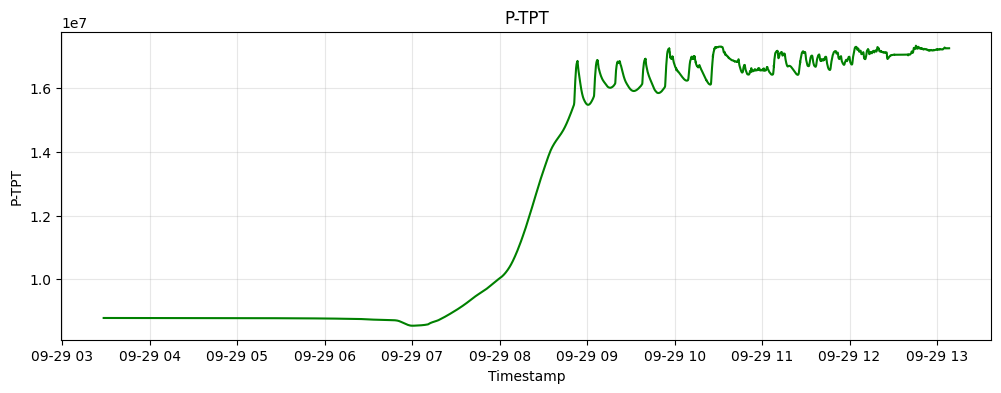

In [5]:
series = sig["P-TPT"]

fig, ax = plt.subplots(figsize=(12, 4))
DataVisualization.plot_series(
    series=series,
    title="P-TPT",
    xlabel="Timestamp",
    ylabel="P-TPT",
    overlay_events=False,
    color="green",
    ax=ax
)
fig.show()


#### Example 2: Multiple Subplots


DataVisualization: Chart saved to 'D:\Git\3W\toolkit\output\3w_plots\p-tpt.png'
DataVisualization: Chart saved to 'D:\Git\3W\toolkit\output\3w_plots\p-anular.png'


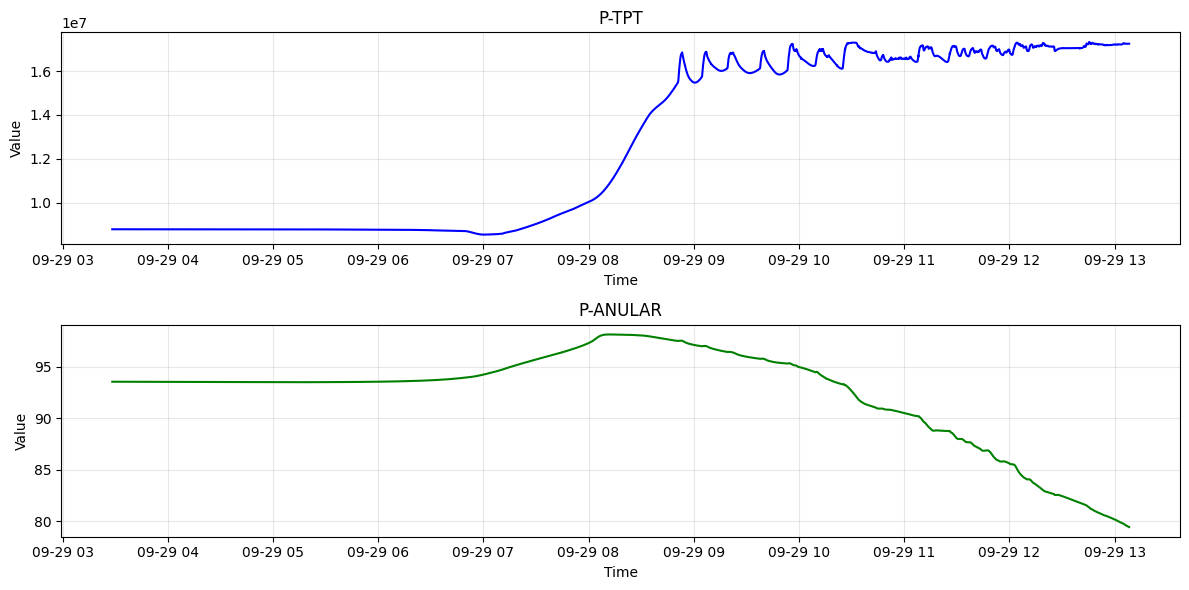

In [6]:
series_P_TPT = sig["P-TPT"]
series_P_ANULAR = sig["T-TPT"]

#create subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 6))

#use plot_series with specified Axes
DataVisualization.plot_series(series_P_TPT, "P-TPT", "Time", "Value", ax=axs[0], color="blue")
DataVisualization.plot_series(series_P_ANULAR, "P-ANULAR", "Time", "Value", ax=axs[1], color="green")

plt.tight_layout()
plt.show()


#### Example 3: Time Series with Missing Values (Event Detection)


DataVisualization: Chart saved to 'D:\Git\3W\toolkit\output\3w_plots\event_series_with_nan_values.png'


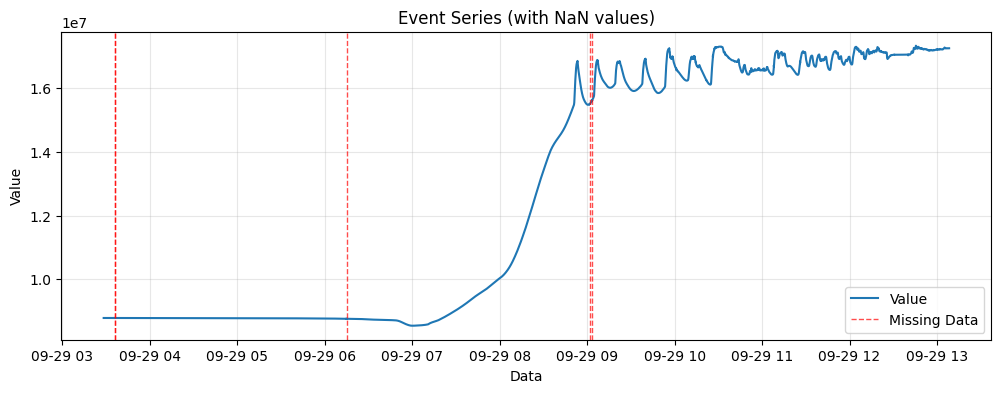

In [7]:
series_P_TPT = sig["P-TPT"].copy()
series_P_TPT.iloc[[456, 10000, 20000, 20100]] = np.nan  #adding NaNs

fig, ax = plt.subplots(figsize=(12, 4))
fig = DataVisualization.plot_series(
    series=series_P_TPT,
    title="Event Series (with NaN values)",
    xlabel="Data",
    ylabel="Value",
    overlay_events=True,
    ax=ax
)
plt.show()


---------

## Multiple Series - comparing multiple time series

The `plot_multiple_series` method allows you to visualize and compare multiple time series in a single plot, making it ideal for analyzing relationships between different sensors or features.


#### Example 1: Simple Multiple Time Series Comparison


DataVisualization: Chart saved to 'D:\Git\3W\toolkit\output\3w_plots\t-jus-ckp_t-tpt.png'


C:\Users\Math\AppData\Local\Temp\ipykernel_32796\3025981314.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


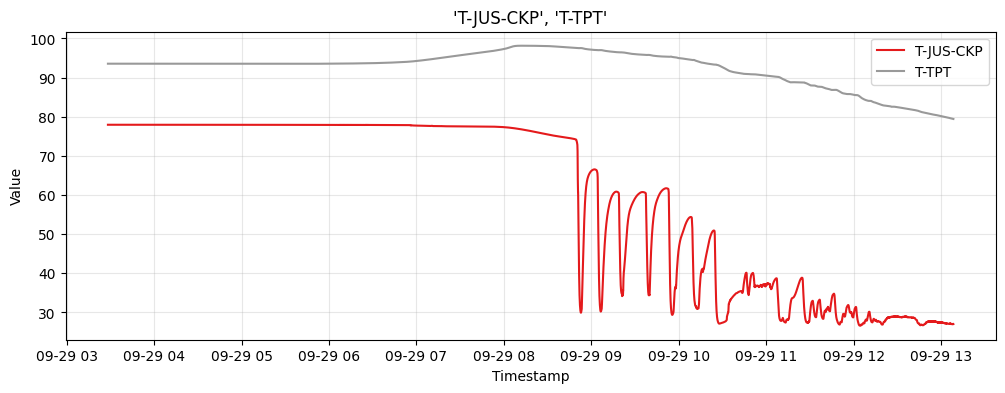

In [8]:
series_list = [sig['T-JUS-CKP'], sig['T-TPT']]

fig, ax = plt.subplots(figsize=(12, 4))
DataVisualization.plot_multiple_series(
    series_list=series_list,
    labels=['T-JUS-CKP', 'T-TPT'],
    title="'T-JUS-CKP', 'T-TPT'",
    xlabel="Timestamp",
    ylabel="Value",
    ax=ax
)
fig.show()


#### Example 2: Using Subplots for Different Groups


DataVisualization: Chart saved to 'D:\Git\3W\toolkit\output\3w_plots\group_1.png'
DataVisualization: Chart saved to 'D:\Git\3W\toolkit\output\3w_plots\group_2.png'


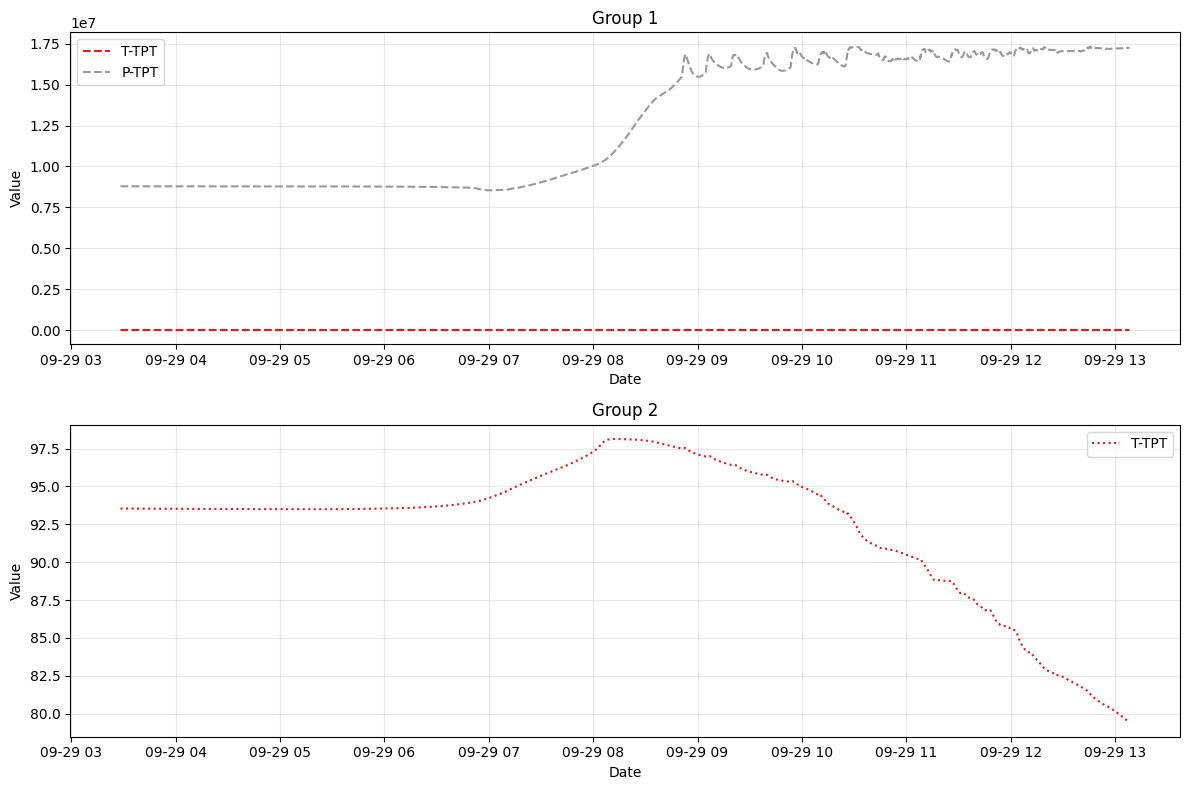

In [9]:
series_list_group1 = [sig["T-TPT"], sig["P-TPT"]]
series_list_group2 = [sig["T-TPT"]]


fig, axs = plt.subplots(2, 1, figsize=(12, 8))

#First plot: A and B
DataVisualization.plot_multiple_series(
    series_list=series_list_group1,
    labels=["T-TPT", "P-TPT"],
    title="Group 1",
    xlabel="Date",
    ylabel="Value",
    ax=axs[0],
    linestyle="--"
)

#Second plot: C and D
DataVisualization.plot_multiple_series(
    series_list=series_list_group2,
    labels=["T-TPT"],
    title="Group 2",
    xlabel="Date",
    ylabel="Value",
    ax=axs[1],
    linestyle=":"
)

plt.tight_layout()
plt.show()


## Next Steps

🎉 **Nice!** Now you can use the **3W Toolkit** data visualization tools!

### What's Next?

1. **Model Training and Evaluation**: Discover how to train and evaluate machine learning models in [Notebook 7: Model Training and Evaluation](7_model_training_and_evaluation.ipynb)
2. **Pipeline Integration and Report Generation**: Discover how to chain together all the steps of your machine learning workflow in a single, cohesive structure and to create comprehensive HTML or LaTeX reports from model evaluation results.data in [Notebook 8: Pipeline Integration](8_pipeline_integration.ipynb)
---

---

**📚 Tutorial Navigation:**
- **Previous**: [5. Feature Extraction](5_feature_extraction.ipynb)
- **Next**: [7. Model Training and Evaluation](7_model_training_and_evaluation.ipynb)

**🔗 Additional Resources:**
- [3W Project Repository](https://github.com/petrobras/3W)
- [3W Dataset on Figshare](https://figshare.com/projects/3W_Dataset/251195)